## Bank ATM Fraud Detection

**Problem Statement:** PredCatch Analytics' Australian banking client's profitability and reputation are being hit by fraudulent ATM transactions. They want PredCatch to help them in reducing and if possible completely eliminating such fraudulent transactions. PredCatch believes it can do the same by building a predictive model to catch such fraudulent transactions in real time and decline them. Your job as PredCatch's Data Scientist is to build this fraud detection & prevention predictive model in the first step. If successful, in the 2nd step you will have to present your solutions and explain how it works to the client. The data has been made available to you. 
The challenging part of the problem is that the data contains very few fraud instances in comparison to the overall population. To give more edge to the solution they have also collected data regarding location [geo_scores] of the transactions, their own proprietary index [Lambda_wts], on network turn around times [Qset_tats] and vulnerability qualification score [instance_scores]. As of now you don't need to understand what they mean.
Training data contains masked variables pertaining to each transaction id . Your prediction target here is 'Target' .
1: Fraudulent transactions
0: Clean transactions

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import datetime 

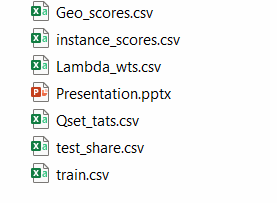

In [2]:
geo = pd.read_csv('Geo_scores.csv')
instance = pd.read_csv('instance_scores.csv')
lambda_wts = pd.read_csv('Lambda_wts.csv')
qset = pd.read_csv('Qset_tats.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test_share.csv')

# geo

In [3]:
geo.head(2)

,id,geo_score
0,26674,4.48
1,204314,4.48


In [4]:
geo.shape

(1424035, 2)

In [5]:
geo['id'].nunique()

284807

In [7]:
geo.isnull().sum()/len(geo)*100

id           0.000000
geo_score    5.023964
dtype: float64

In [8]:
geo.describe()

,id,geo_score
count,1.424035e+06,1.352492e+06
mean,1.424030e+05,-9.279168e-06
std,8.221673e+04,7.827199e+00
min,0.000000e+00,-1.093900e+02
25%,7.120100e+04,-5.860000e+00
50%,1.424030e+05,1.800000e-01
75%,2.136050e+05,5.860000e+00
max,2.848060e+05,4.581000e+01


<AxesSubplot:ylabel='geo_score'>

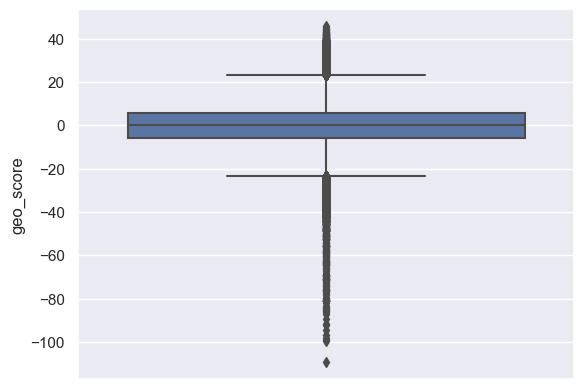

In [9]:
sns.boxplot(y='geo_score', data=geo)

In [10]:
geo.fillna(geo['geo_score'].median(), inplace=True)

In [11]:
geo.isnull().sum()

id           0
geo_score    0
dtype: int64

In [50]:
geo.shape

(1424035, 2)

In [51]:
geo.nunique()

id           284807
geo_score     25524
dtype: int64

In [52]:
geo = geo.groupby('id').mean()

In [53]:
geo.shape

(284807, 1)

In [56]:
geo.head(2)

,geo_score
id,
0,-0.620
1,1.106


# instance

In [12]:
instance.shape

(1424035, 2)

In [13]:
instance.head(2)

,id,instance_scores
0,173444,-0.88
1,259378,1.50


In [14]:
instance.nunique()

id                 284807
instance_scores     11158
dtype: int64

In [15]:
instance.isnull().sum()

id                 0
instance_scores    0
dtype: int64

In [54]:
instance.shape

(1424035, 2)

In [57]:
instance = instance.groupby('id').mean()

In [58]:
instance.shape

(284807, 1)

# lambda_wts

In [17]:
lambda_wts.head(2)

,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88


In [18]:
lambda_wts.shape

(1400, 2)

In [19]:
lambda_wts.isnull().sum()

Group        0
lambda_wt    0
dtype: int64

# qset

In [20]:
qset.head(2)

,id,qsets_normalized_tat
0,9983,2.41
1,266000,3.10


In [21]:
qset.shape

(1424035, 2)

In [22]:
qset.nunique()

id                      284807
qsets_normalized_tat     24832
dtype: int64

In [24]:
qset.isnull().sum()/len(qset)*100

id                      0.000000
qsets_normalized_tat    7.247083
dtype: float64

<AxesSubplot:ylabel='qsets_normalized_tat'>

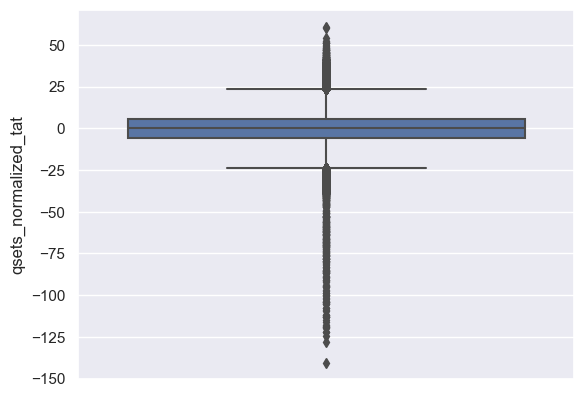

In [25]:
sns.boxplot(y='qsets_normalized_tat', data=qset)

In [26]:
qset.fillna(qset['qsets_normalized_tat'].median(), inplace=True)

In [27]:
qset.isnull().sum()

id                      0
qsets_normalized_tat    0
dtype: int64

In [59]:
qset.shape

(1424035, 2)

In [60]:
qset = qset.groupby('id').mean()

In [61]:
qset.shape

(284807, 1)

# train

In [28]:
train.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.680000,0.726667,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.716667,0.743333,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0


In [29]:
train.shape

(227845, 28)

In [30]:
test.shape

(56962, 27)

In [31]:
227845+56962

284807

In [32]:
train.isnull().sum()

id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
Target            0
dtype: int64

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              227845 non-null  int64  
 1   Group           227845 non-null  object 
 2   Per1            227845 non-null  float64
 3   Per2            227845 non-null  float64
 4   Per3            227845 non-null  float64
 5   Per4            227845 non-null  float64
 6   Per5            227845 non-null  float64
 7   Per6            227845 non-null  float64
 8   Per7            227845 non-null  float64
 9   Per8            227845 non-null  float64
 10  Per9            227845 non-null  float64
 11  Dem1            227845 non-null  float64
 12  Dem2            227845 non-null  float64
 13  Dem3            227845 non-null  float64
 14  Dem4            227845 non-null  float64
 15  Dem5            227845 non-null  float64
 16  Dem6            227845 non-null  float64
 17  Dem7      

In [34]:
test.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.626667,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.480000,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.706667,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200


In [35]:
train['Group'].nunique()

1301

In [36]:
test['Group'].nunique()

915

In [38]:
train['data'] = 'train'

In [39]:
train.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0,train


In [40]:
test['data']='test'

In [41]:
test.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,test
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,test
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,test
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,test
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,test


In [42]:
train.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data'],
      dtype='object')

In [43]:
test.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'data'],
      dtype='object')

In [44]:
all_data = pd.concat([train, test], axis=0)

In [46]:
all_data.shape

(284807, 29)

In [55]:
all_data['id'].nunique()

284807

In [48]:
all_data.tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,NaN,test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,NaN,test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,NaN,test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,NaN,test
56961,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,...,0.670000,0.770000,0.893333,0.586667,0.616667,0.683333,0.650000,-248.4500,NaN,test


In [49]:
all_data['Group'].nunique()

1400

In [62]:
geo.head(1)

,geo_score
id,
0,-0.62


# merge all 4 data into all_dataset

In [63]:
all_data = pd.merge(all_data, geo, on='id', how='left')

In [64]:
all_data.shape

(284807, 30)

In [65]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850


In [66]:
# instance
instance.head(2)

,instance_scores
id,
0,0.09
1,-0.17


In [67]:
all_data = pd.merge(all_data, instance, on='id', how='left')

In [68]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47


In [69]:
lambda_wts.shape

(1400, 2)

In [70]:
lambda_wts.head()

,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88
2,Grp188,0.39
3,Grp1053,-2.75
4,Grp56,-0.83


In [71]:
all_data['Group'].nunique()

1400

In [72]:
all_data = pd.merge(all_data, lambda_wts, on='Group', how='left')

In [73]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52,0.66
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56,-0.51
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70,0.72
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47,0.60


In [74]:
qset.shape

(284807, 1)

In [75]:
qset.head(2)

,qsets_normalized_tat
id,
0,0.214
1,-0.110


In [76]:
all_data = pd.merge(all_data, qset, on='id', how='left')

In [77]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,lambda_wt,qsets_normalized_tat
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06,-0.13,-0.700
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52,0.66,0.140
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56,-0.51,-0.430
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70,0.72,-0.302
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47,0.60,-0.630


In [78]:
all_data.isnull().sum()

id                          0
Group                       0
Per1                        0
Per2                        0
Per3                        0
Per4                        0
Per5                        0
Per6                        0
Per7                        0
Per8                        0
Per9                        0
Dem1                        0
Dem2                        0
Dem3                        0
Dem4                        0
Dem5                        0
Dem6                        0
Dem7                        0
Dem8                        0
Dem9                        0
Cred1                       0
Cred2                       0
Cred3                       0
Cred4                       0
Cred5                       0
Cred6                       0
Normalised_FNT              0
Target                  56962
data                        0
geo_score                   0
instance_scores             0
lambda_wt                   0
qsets_normalized_tat        0
dtype: int

In [79]:
train = all_data[all_data['data']=='train']
test = all_data[all_data['data']=='test']

In [80]:
train.shape

(227845, 33)

In [81]:
test.shape

(56962, 33)

In [83]:
train.head(10)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,lambda_wt,qsets_normalized_tat
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06,-0.13,-0.700
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52,0.66,0.140
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56,-0.51,-0.430
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70,0.72,-0.302
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47,0.60,-0.630
5,144029,Grp45,0.873333,0.140000,0.836667,0.273333,0.190000,0.653333,0.503333,0.723333,...,0.700000,0.666667,0.686667,-176.2000,0.0,train,1.336,-1.16,0.14,-0.020
6,127618,Grp69,0.980000,0.546667,0.820000,0.863333,0.680000,1.163333,0.486667,0.893333,...,0.790000,0.676667,0.663333,-242.6275,0.0,train,0.776,-0.18,0.59,1.150
7,116319,Grp198,-0.136667,0.360000,0.366667,0.996667,0.473333,0.706667,0.676667,0.933333,...,0.603333,0.826667,0.626667,-191.0050,0.0,train,-0.230,0.59,0.72,0.760
8,66485,Grp57,1.010000,0.606667,0.823333,1.066667,0.516667,0.653333,0.633333,0.703333,...,0.490000,0.670000,0.673333,-229.3475,0.0,train,0.620,-0.01,0.32,-0.380
9,117942,Grp271,-0.133333,0.890000,0.210000,0.333333,0.743333,1.023333,0.416667,0.096667,...,0.973333,0.700000,0.616667,-217.2425,0.0,train,1.210,-1.33,1.02,-0.420


In [82]:
train.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'geo_score', 'instance_scores',
       'lambda_wt', 'qsets_normalized_tat'],
      dtype='object')

In [84]:
# split the data into ind and dependent variable 
x_train = train.drop(['id','Group','Target','data'], axis=1)
y_train = train['Target']

In [85]:
x_train.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,lambda_wt,qsets_normalized_tat
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.256,-0.06,-0.13,-0.700
1,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,-0.250,0.52,0.66,0.140
2,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,-0.950,1.56,-0.51,-0.430
3,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.490,0.70,0.72,-0.302
4,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.850,-0.47,0.60,-0.630


In [87]:
x_train.isnull().sum()

Per1                    0
Per2                    0
Per3                    0
Per4                    0
Per5                    0
Per6                    0
Per7                    0
Per8                    0
Per9                    0
Dem1                    0
Dem2                    0
Dem3                    0
Dem4                    0
Dem5                    0
Dem6                    0
Dem7                    0
Dem8                    0
Dem9                    0
Cred1                   0
Cred2                   0
Cred3                   0
Cred4                   0
Cred5                   0
Cred6                   0
Normalised_FNT          0
geo_score               0
instance_scores         0
lambda_wt               0
qsets_normalized_tat    0
dtype: int64

In [86]:
y_train.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Target, dtype: float64

In [104]:
y_train.value_counts()

0.0    227451
1.0       394
Name: Target, dtype: int64

In [126]:
fraud = train[train['Target']==1]

In [128]:
fraud

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,lambda_wt,qsets_normalized_tat
357,64460,Grp1075,-3.070000,3.303333,-3.996667,2.110000,-2.160000,-0.503333,-2.313333,3.233333,...,0.580000,1.026667,0.736667,-225.0025,1.0,train,-5.790,-5.93,-6.53,-6.696
591,131272,Grp28,0.630000,1.013333,1.326667,1.710000,0.420000,1.183333,0.100000,-0.066667,...,0.826667,0.710000,0.740000,-249.9500,1.0,train,0.930,0.27,0.52,0.310
1792,154633,Grp359,0.326667,1.166667,-0.830000,1.280000,0.876667,-0.246667,0.150000,0.820000,...,0.593333,0.796667,0.660000,-244.4900,1.0,train,-5.364,-4.36,-3.09,-3.170
1801,15506,Grp787,-6.630000,4.976667,-7.366667,2.733333,-4.823333,-0.820000,-4.840000,5.513333,...,0.593333,1.176667,0.816667,-225.0025,1.0,train,-7.570,-8.65,-7.83,-13.000
2031,204064,Grp1317,0.743333,0.980000,-0.883333,1.693333,0.033333,0.320000,0.326667,0.850000,...,0.730000,0.726667,0.656667,-163.7500,1.0,train,-2.974,-3.52,-5.39,-2.290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225728,42609,Grp994,-1.500000,2.250000,-2.323333,3.033333,-1.653333,-0.273333,-2.776667,2.010000,...,0.693333,1.140000,0.680000,-229.1550,1.0,train,-13.700,-11.63,-13.04,-24.016
225924,88307,Grp375,0.133333,1.536667,-0.330000,1.686667,-0.166667,0.486667,-0.093333,1.090000,...,0.650000,0.773333,0.713333,-205.0000,1.0,train,-4.980,-3.83,-4.55,-5.370
226338,141258,Grp1210,0.353333,1.820000,-1.483333,2.310000,-0.076667,-0.096667,-1.233333,1.113333,...,1.056667,1.123333,0.910000,-250.0000,1.0,train,-9.450,-8.10,-12.99,-12.726
227267,249607,Grp1370,-1.793333,-1.816667,-0.900000,1.910000,2.733333,-1.470000,-1.276667,1.153333,...,0.800000,0.900000,0.256667,-241.2500,1.0,train,-3.274,-4.03,-5.76,-1.910


In [132]:
fraudlent_transaction = (394/(227451+394))*100
fraudlent_transaction

0.17292457591783889

In [89]:
test.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,lambda_wt,qsets_normalized_tat
227845,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.796667,0.823333,0.783333,-249.7500,NaN,test,0.25,-0.04,0.76,-0.426
227846,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.630000,0.673333,0.673333,-249.8125,NaN,test,0.43,-0.77,0.18,-0.620
227847,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.596667,0.680000,0.670000,-248.1200,NaN,test,1.32,0.11,0.39,-0.406
227848,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.320000,0.676667,0.660000,-222.9875,NaN,test,-2.11,0.33,1.80,0.374
227849,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.546667,0.650000,0.663333,-196.2200,NaN,test,-2.11,-0.37,1.89,-0.130


In [88]:
test.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'geo_score', 'instance_scores',
       'lambda_wt', 'qsets_normalized_tat'],
      dtype='object')

In [90]:
x_test = test.drop(['id','Group','Target','data'], axis=1)
y_test = test['Target']

In [91]:
x_test.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,lambda_wt,qsets_normalized_tat
227845,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,0.930000,0.156667,...,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,0.25,-0.04,0.76,-0.426
227846,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,0.543333,0.433333,...,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,0.43,-0.77,0.18,-0.620
227847,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,0.593333,1.250000,...,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,1.32,0.11,0.39,-0.406
227848,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,1.156667,1.186667,...,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,-2.11,0.33,1.80,0.374
227849,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,1.476667,1.213333,...,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,-2.11,-0.37,1.89,-0.130


In [92]:
y_test.head()

227845   NaN
227846   NaN
227847   NaN
227848   NaN
227849   NaN
Name: Target, dtype: float64

In [94]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227845 entries, 0 to 227844
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Per1                  227845 non-null  float64
 1   Per2                  227845 non-null  float64
 2   Per3                  227845 non-null  float64
 3   Per4                  227845 non-null  float64
 4   Per5                  227845 non-null  float64
 5   Per6                  227845 non-null  float64
 6   Per7                  227845 non-null  float64
 7   Per8                  227845 non-null  float64
 8   Per9                  227845 non-null  float64
 9   Dem1                  227845 non-null  float64
 10  Dem2                  227845 non-null  float64
 11  Dem3                  227845 non-null  float64
 12  Dem4                  227845 non-null  float64
 13  Dem5                  227845 non-null  float64
 14  Dem6                  227845 non-null  float64
 15  

In [95]:
x_train.describe()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,lambda_wt,qsets_normalized_tat
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,0.666006,0.667701,0.666315,0.666687,0.666723,0.667378,0.666934,0.666279,0.666688,0.666576,...,0.666264,0.666755,0.666878,0.666566,0.666776,-227.954170,0.008908,-0.000123,0.000350,0.001346
std,0.654133,0.548305,0.506357,0.471956,0.461393,0.444573,0.415657,0.401546,0.366537,0.340436,...,0.202204,0.174204,0.160803,0.135762,0.111612,61.951661,0.997629,1.091488,0.957957,0.850169
min,-18.136667,-23.573333,-15.443333,-1.226667,-37.246667,-8.053333,-13.853333,-23.740000,-3.810000,-0.893333,...,-0.280000,-2.766667,-0.080000,-6.856667,-4.476667,-250.000000,-18.680000,-24.590000,-19.210000,-25.156000
25%,0.360000,0.470000,0.370000,0.383333,0.436667,0.410000,0.483333,0.596667,0.453333,0.413333,...,0.546667,0.560000,0.556667,0.643333,0.650000,-248.617500,-0.400000,-0.540000,-0.430000,-0.480000
50%,0.670000,0.690000,0.726667,0.660000,0.650000,0.576667,0.680000,0.673333,0.650000,0.656667,...,0.680000,0.673333,0.650000,0.666667,0.670000,-244.510000,0.150000,-0.090000,0.050000,-0.066000
75%,1.103333,0.933333,1.010000,0.913333,0.870000,0.800000,0.856667,0.776667,0.866667,0.913333,...,0.813333,0.783333,0.746667,0.696667,0.693333,-230.750000,0.630000,0.450000,0.490000,0.400000
max,1.483333,8.020000,3.793333,6.163333,12.266667,25.100000,40.863333,7.336667,5.863333,4.673333,...,2.193333,3.173333,1.840000,11.203333,11.950000,6172.790000,7.850000,23.750000,10.530000,8.540000


In [ ]:
# Please do EDA part - heatmap, pairplot, distplot, Pandas profiling, Dtale, dataprep etc

In [97]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x_train = sc.fit_transform(x_train)
sc_x_test = sc.fit_transform(x_test)

In [99]:
# split the data into training and test
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(sc_x_train, y_train, test_size=0.2, random_state=1)

# Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train1, y_train1)

LogisticRegression()

In [101]:
y_pred_logit_train = logit.predict(x_train1)
y_pred_logit_test = logit.predict(x_test1)

In [102]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [103]:
confusion_matrix(y_test1, y_pred_logit_test)

array([[45471,     5],
       [   50,    43]], dtype=int64)

In [107]:
print(classification_report(y_train1,y_pred_logit_train))
print("************************"*10)
print(classification_report(y_test1,y_pred_logit_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181975
         1.0       0.87      0.64      0.74       301

    accuracy                           1.00    182276
   macro avg       0.94      0.82      0.87    182276
weighted avg       1.00      1.00      1.00    182276

************************************************************************************************************************************************************************************************************************************************
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45476
         1.0       0.90      0.46      0.61        93

    accuracy                           1.00     45569
   macro avg       0.95      0.73      0.80     45569
weighted avg       1.00      1.00      1.00     45569



In [108]:
print(accuracy_score(y_train1,y_pred_logit_train))
print("************************"*10)
print(accuracy_score(y_test1,y_pred_logit_test))

0.9992483925475653
************************************************************************************************************************************************************************************************************************************************
0.998793039127477


# RandomForest Classification Model

In [110]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy', random_state=1)
rf.fit(x_train1, y_train1)

RandomForestClassifier(criterion='entropy', random_state=1)

In [111]:
y_pred_rf_train = rf.predict(x_train1)
y_pred_rf_test = rf.predict(x_test1)

In [112]:
print(classification_report(y_train1,y_pred_rf_train))
print("************************"*10)
print(classification_report(y_test1,y_pred_rf_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181975
         1.0       1.00      1.00      1.00       301

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276

************************************************************************************************************************************************************************************************************************************************
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45476
         1.0       0.94      0.69      0.80        93

    accuracy                           1.00     45569
   macro avg       0.97      0.84      0.90     45569
weighted avg       1.00      1.00      1.00     45569



In [113]:
print(accuracy_score(y_train1,y_pred_rf_train))
print("************************"*10)
print(accuracy_score(y_test1,y_pred_rf_test))

1.0
************************************************************************************************************************************************************************************************************************************************
0.9992758234764862


# XGBoost Classifier 

In [ ]:
# !pip install xgboost

In [115]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb = xgb.fit(x_train1, y_train1)

In [117]:
y_pred_xgb_train = xgb.predict(x_train1)
y_pred_xgb_test = xgb.predict(x_test1)

In [118]:
print(classification_report(y_train1,y_pred_xgb_train))
print("************************"*10)
print(classification_report(y_test1,y_pred_xgb_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181975
         1.0       1.00      1.00      1.00       301

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276

************************************************************************************************************************************************************************************************************************************************
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45476
         1.0       0.94      0.73      0.82        93

    accuracy                           1.00     45569
   macro avg       0.97      0.87      0.91     45569
weighted avg       1.00      1.00      1.00     45569



In [119]:
print(accuracy_score(y_train1,y_pred_xgb_train))
print("************************"*10)
print(accuracy_score(y_test1,y_pred_xgb_test))

1.0
************************************************************************************************************************************************************************************************************************************************
0.9993636024490333


In [122]:
x_test.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,lambda_wt,qsets_normalized_tat
227845,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,0.930000,0.156667,...,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,0.25,-0.04,0.76,-0.426
227846,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,0.543333,0.433333,...,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,0.43,-0.77,0.18,-0.620
227847,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,0.593333,1.250000,...,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,1.32,0.11,0.39,-0.406
227848,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,1.156667,1.186667,...,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,-2.11,0.33,1.80,0.374
227849,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,1.476667,1.213333,...,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,-2.11,-0.37,1.89,-0.130


In [123]:
final_target_value = xgb.predict(sc_x_test)

In [124]:
final_target_value

array([0, 0, 0, ..., 0, 0, 0])

# ISOLATION FOREST, Local Outlier Factor , OneClassSVM - These models dedicated for anomaly detection

In [121]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [ ]:
OneClassSVM()

In [125]:
classification = {'IsolationForest' : IsolationForest(n_estimators=100,max_samples=len(x_train), 
                                                    contamination= fraudlent_transaction),
                 
                 "LocalOutlierFactor" : LocalOutlierFactor(n_neighbors=20, contamination=fraudlent_transaction),
                 "OneClassSVM" : OneClassSVM()}

In [136]:
n_outlier = len(fraud)
n_outlier

394

In [129]:
isolaction = IsolationForest(n_estimators=100,max_samples=len(x_train), contamination= fraudlent_transaction)

In [130]:
isolaction.fit(x_train1, y_train1)

IsolationForest(contamination=0.17322412299792042, max_samples=227845)

In [133]:
y_pred_isolaction_train = isolaction.predict(x_train1)
y_pred_isolaction_test = isolaction.predict(x_test1)

In [134]:
print(classification_report(y_train1,y_pred_isolaction_train))
print("************************"*10)
print(classification_report(y_test1,y_pred_isolaction_test))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00    181975
         1.0       0.00      0.07      0.00       301

    accuracy                           0.00    182276
   macro avg       0.00      0.02      0.00    182276
weighted avg       0.00      0.00      0.00    182276

************************************************************************************************************************************************************************************************************************************************
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00     45476
         1.0       0.00      0.14      0.00        93

    accuracy                           0.00     45569
   macro avg       0.00      0.05      0.00     45569
weighted avg       0.00      0.00      0.00     4556

In [135]:
print(accuracy_score(y_train1,y_pred_isolaction_train))
print("************************"*10)
print(accuracy_score(y_test1,y_pred_isolaction_test))

0.00012069608725229871
************************************************************************************************************************************************************************************************************************************************
0.0002852816607781606
